<a href="https://colab.research.google.com/github/Rabita2005/weatherwise/blob/main/starter_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WeatherWise Application - A Simple Weather Tool with AI Features
This notebook contains a Python application that fetches weather data
using the wttr.in API, visualizes the forecast, and can answer natural language weather questions using a simple AI parser.


Student Name: Rabita Sami

Student ID: 21584307

## --- SETUP: INSTALL PACKAGES ---
### Note: Only needed in Google Colab. Uncomment if running there.
### Installs required Python packages if not already present.

In [1]:
!pip install fetch-my-weather # Uncommented this line to install the missing module
!pip install hands-on-ai # Uncommented this line to install the missing module
!pip install pyinputplus


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 58.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.9/69.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.5/80.5 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.8/459.8 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 64.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.8/454.8 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 70.2 MB/s eta 0:00:00
  Attempting uninstall: fastcore
    Found existing in

## --- IMPORTS ---
### Import necessary libraries and modules.

In [2]:
import os
import requests
import matplotlib.pyplot as plt
import pyinputplus as pyip
from fetch_my_weather import get_weather # Assumes this module is installed and works
from hands_on_ai.chat import get_response # This import should now work after installing hands-on-ai

In [3]:
# --- ENVIRONMENT VARIABLES ---
# Configure environment variables for the hands-on-ai module.
# Replace with your actual server, model, and API key if needed.
os.environ['HANDS_ON_AI_SERVER'] = 'http://ollama.serveur.au'
os.environ['HANDS_ON_AI_MODEL'] = 'granite3.2'
os.environ['HANDS_ON_AI_API_KEY'] = 'Student-API-123'

## WEATHER DATA FETCH FUNCTION


In [4]:
def get_weather_data(location):
    """
    Fetch weather data from wttr.in API for a given location.

    Args:
        location (str): The name of the location (city, country, etc.).

    Returns:
        dict: A dictionary containing weather data (forecast, current condition)
              or an error message if fetching fails.
    """
    try:
        # Construct the API URL for the specified location and JSON format.
        url = f"http://wttr.in/{location}?format=j1"
        response = requests.get(url)
        # Raise an exception for bad status codes (4xx or 5xx).
        response.raise_for_status()
        data = response.json()

        # Check if essential keys are present in the API response.
        if 'weather' not in data or 'current_condition' not in data:
            return {"error": "Incomplete data from API."}

        # Return the relevant weather data.
        return {
            "location": location,
            "forecast": data["weather"],
            "current": data["current_condition"][0]
        }

    except Exception as e:
        # Catch any errors during the process and return an error message.
        return {"error": str(e)}

## 📊 Visualisation Functions

In [5]:
def create_temperature_visualisation(weather_data, output_type='display'):
    """
    Plot max and min temperature forecast for upcoming days.

    Args:
        weather_data (dict): A dictionary containing weather data,
                             as returned by get_weather_data.
        output_type (str): 'display' to show the plot, 'figure' to return the figure object.

    Returns:
        matplotlib.figure.Figure or None: The figure object if output_type is 'figure',
                                          otherwise None (plot is displayed).
    """
    # Extract dates and temperatures from the weather data.
    days = [day['date'] for day in weather_data['forecast']]
    max_temps = [int(day['maxtempC']) for day in weather_data['forecast']]
    min_temps = [int(day['mintempC']) for day in weather_data['forecast']]

    # Create a figure and axes for the plot.
    fig, ax = plt.subplots()
    # Plot max temperatures with markers.
    ax.plot(days, max_temps, marker='o', label='Max Temp')
    # Plot min temperatures with markers and a dashed line.
    ax.plot(days, min_temps, marker='o', linestyle='--', label='Min Temp')
    # Set plot title and labels.
    ax.set_title(f"Daily Temperatures in {weather_data['location']}")
    ax.set_ylabel("Temperature (°C)")
    ax.set_xlabel("Date")
    # Add a legend to identify the lines.
    ax.legend()
    # Rotate x-axis labels for better readability.
    plt.xticks(rotation=45)
    # Adjust layout to prevent labels overlapping.
    plt.tight_layout()

    # Determine whether to return the figure or display it.
    if output_type == 'figure':
        return fig
    else:
        plt.show()


In [6]:

def create_precipitation_visualisation(weather_data, output_type='display'):
    """
    Plot precipitation forecast for upcoming days.

    Args:
        weather_data (dict): A dictionary containing weather data,
                             as returned by get_weather_data.
        output_type (str): 'display' to show the plot, 'figure' to return the figure object.

    Returns:
        matplotlib.figure.Figure or None: The figure object if output_type is 'figure',
                                          otherwise None (plot is displayed).
    """
    # Extract dates and precipitation data.
    days = [day['date'] for day in weather_data['forecast']]
    # Get precipitation for the first hour of each day's forecast (as an example).
    precip = [float(day['hourly'][0]['precipMM']) for day in weather_data['forecast']]

    # Create a figure and axes for the plot.
    fig, ax = plt.subplots()
    # Create a bar chart for precipitation.
    ax.bar(days, precip, color='skyblue')
    # Set plot title and labels.
    ax.set_title(f"Daily Rainfall in {weather_data['location']}")
    ax.set_ylabel("Precipitation (mm)")
    ax.set_xlabel("Date")
    # Rotate x-axis labels.
    plt.xticks(rotation=45)
    # Adjust layout.
    plt.tight_layout()

    # Determine whether to return the figure or display it.
    if output_type == 'figure':
        return fig
    else:
        plt.show()


def create_humidity_visualisation(weather_data):
    """
    Plot humidity at noon for each upcoming day.

    Args:
        weather_data (dict): A dictionary containing weather data,
                             as returned by get_weather_data.
    """
    # Extract dates and humidity data.
    days = [day['date'] for day in weather_data['forecast']]
    # Get humidity at the 4th hour index, which approximates noon (hourly data is typically 3-hourly).
    humidity = [int(day['hourly'][4]['humidity']) for day in weather_data['forecast']]

    # Create a figure and axes for the plot.
    fig, ax = plt.subplots()
    # Plot humidity with markers.
    ax.plot(days, humidity, marker='x', color='green')
    # Set plot title and labels.
    ax.set_title(f"Midday Humidity in {weather_data['location']}")
    ax.set_ylabel("Humidity (%)")
    ax.set_xlabel("Date")
    # Rotate x-axis labels.
    plt.xticks(rotation=45)
    # Adjust layout.
    plt.tight_layout()
    # Display the plot.
    plt.show()

## 🤖 Natural Language Processing

In [7]:
def parse_weather_question(question):
    """
    Extract location and weather attribute from a natural language question.

    Args:
        question (str): The user's natural language question.

    Returns:
        dict: A dictionary containing the identified 'location' and 'attribute'.
              Location and attribute might be None if not found.
    """
    # Define keywords to look for regarding weather attributes.
    keywords = ['rain', 'temperature', 'hot', 'cold', 'forecast', 'humidity']
    location = None
    attribute = None

    # Convert question to lowercase for case-insensitive matching.
    q_lower = question.lower()

    # Check for weather attribute keywords in the question.
    for word in keywords:
        if word in q_lower:
            attribute = word
            break # Stop after finding the first relevant keyword

    # Define a list of known locations the parser can recognize.
    known_locations = ['Perth', 'Sydney', 'Melbourne', 'Hanoi', 'New York']
    # Check for known locations in the question.
    for city in known_locations:
        if city.lower() in q_lower:
            location = city
            break # Stop after finding the first recognised location

    # Return the identified location and attribute.
    return {"location": location, "attribute": attribute}

## USER INTERFACE

In [8]:
def generate_weather_response(parsed_question, weather_data):
    """
    Generate a simple AI-style text response based on the parsed question
    and fetched weather data for today.

    Args:
        parsed_question (dict): The output from parse_weather_question.
        weather_data (dict): The weather data for the location, as returned
                             by get_weather_data.

    Returns:
        str: A text response summarising the requested weather information
             for today, or a default response.
    """
    # Extract attribute and location from the parsed question and weather data.
    attr = parsed_question['attribute']
    loc = weather_data['location']
    # Get the weather data for today (the first day in the forecast).
    today = weather_data['forecast'][0]

    # Generate response based on the identified attribute.
    if attr == 'temperature':
        # Provide today's max and min temperature.
        return f"The maximum temperature today in {loc} is {today['maxtempC']}°C. Minimum is {today['mintempC']}°C."
    elif attr == 'rain':
        # Provide today's predicted precipitation.
        return f"Expected rain today in {loc} is {today['hourly'][0]['precipMM']} mm."
    elif attr == 'humidity':
        # Provide today's humidity at noon (approx).
        return f"Humidity at noon today in {loc} is {today['hourly'][4]['humidity']}%."
    else:
        # Default response if the attribute is not specifically handled.
        # This tries to provide a general weather description for today.
        try:
             return f"Today in {loc}: {today['hourly'][0]['weatherDesc'][0]['value']}"
        except (IndexError, KeyError):
             # Handle cases where weatherDesc might not be available
             return f"Could not get specific weather description for today in {loc}."

## 🧪 APP TESTING FUNCTION

In [9]:
def test_app():
    """
    Run diagnostic tests to ensure core functions are working.
    Fetches data for a default location and attempts to generate visualisations.
    """
    print("\n--- Running Test Suite ---")
    print("Testing weather data fetch for Perth...")
    # Fetch test data for a predefined location.
    test_data = get_weather_data("Perth")

    # Check if fetching data resulted in an error.
    if "error" in test_data:
        print("❌ Weather data fetch failed:", test_data['error'])
    else:
        print("✅ Weather fetch test passed.")
        print("\nSample output for Perth:")
        # Display some key pieces of information from the fetched data.
        print("Date:", test_data['forecast'][0]['date'])
        print("Max Temp:", test_data['forecast'][0]['maxtempC'], "°C")
        print("Rain:", test_data['forecast'][0]['hourly'][0]['precipMM'], "mm")
        print("Humidity:", test_data['forecast'][0]['hourly'][4]['humidity'], "%")

        print("\nTesting visualisations...")
        # Attempt to create the visualisations to check if plotting functions work.
        print("✔️ Checking Temperature Visualisation...")
        create_temperature_visualisation(test_data)
        print("✔️ Checking Precipitation Visualisation...")
        create_precipitation_visualisation(test_data)
        print("✔️ Checking Humidity Visualisation...")
        create_humidity_visualisation(test_data)
        print("✅ Visualisation tests completed.")

##MAIN MENU

In [1]:
def menu():
    """
    Displays the main interactive menu for the WeatherWise application
    and handles user input to access different features.
    """
    while True:
        print("\n--- WeatherWise Main Menu ---")
        # Present a menu of options to the user using pyinputplus.
        choice = pyip.inputMenu([
            'Get Forecast',
            'Ask a Weather Question',
            'Run Tests',
            'Exit'
        ], numbered=True, prompt="Select an option: \n") # Added prompt for clarity

        # Handle the user's choice.
        if choice == 'Get Forecast':
            # Prompt for a location and fetch weather data.
            location = pyip.inputStr("Enter location (e.g., Perth): ")
            data = get_weather_data(location)
            # Check if data fetching was successful.
            if 'error' in data:
                print("Error:", data['error'])
            else:
                # If successful, display the visualisations.
                print(f"\nDisplaying forecast for {location}:")
                create_temperature_visualisation(data)
                create_precipitation_visualisation(data)
                create_humidity_visualisation(data)

        elif choice == 'Ask a Weather Question':
            # Prompt for a natural language question.
            q = pyip.inputStr("What would you like to know? ")
            # Parse the question to identify location and attribute.
            parsed = parse_weather_question(q)

            # Check if a location was recognised.
            if not parsed['location']:
                print("❗ Location not recognised. Try mentioning a known city.")
                continue # Go back to the main menu

            # Fetch weather data for the recognised location.
            data = get_weather_data(parsed['location'])
            # Check if data fetching was successful.
            if 'error' in data:
                print("Error:", data['error'])
                continue # Go back to the main menu

            # Generate an AI-style response based on the parsed question and data.
            reply = generate_weather_response(parsed, data)
            print("🤖 AI says:", reply)

        elif choice == 'Run Tests':
            # Execute the test suite.
            test_app()

        elif choice == 'Exit':
            # Exit the application loop.
            print("Goodbye!")
            break
        else:
             # Fallback for unexpected choices (shouldn't happen with pyip.inputMenu)
             print("Invalid choice. Please try again.")


##RUN APP


--- WeatherWise Main Menu ---
Select an option: 
1. Get Forecast
2. Ask a Weather Question
3. Run Tests
4. Exit
1
Enter location (e.g., Perth): perth

Displaying forecast for perth:


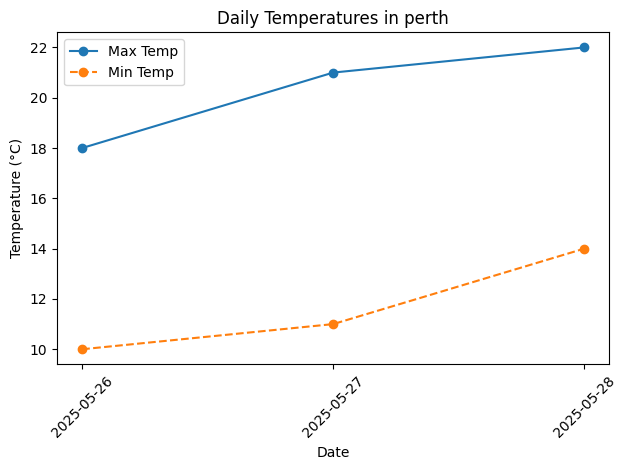

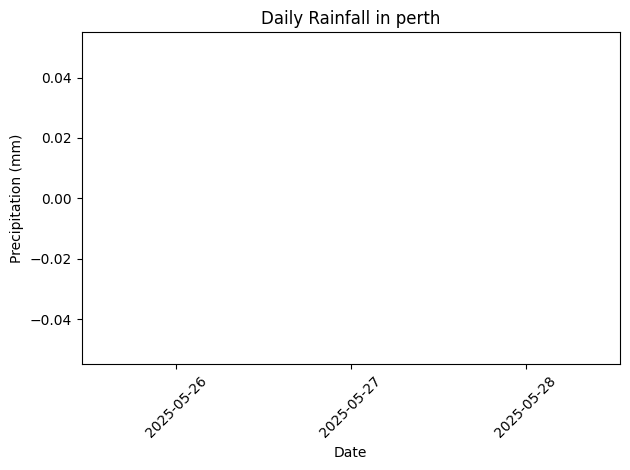

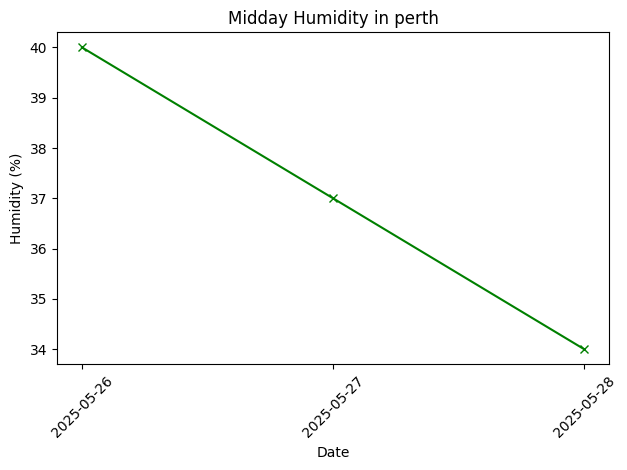


--- WeatherWise Main Menu ---
Select an option: 
1. Get Forecast
2. Ask a Weather Question
3. Run Tests
4. Exit
2
What would you like to know? perth weather today
🤖 AI says: Today in Perth: Clear 

--- WeatherWise Main Menu ---
Select an option: 
1. Get Forecast
2. Ask a Weather Question
3. Run Tests
4. Exit
3

--- Running Test Suite ---
Testing weather data fetch for Perth...
✅ Weather fetch test passed.

Sample output for Perth:
Date: 2025-05-26
Max Temp: 18 °C
Rain: 0.0 mm
Humidity: 40 %

Testing visualisations...
✔️ Checking Temperature Visualisation...


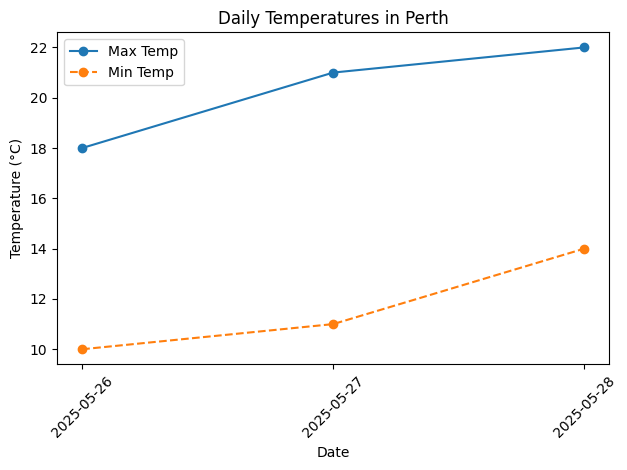

✔️ Checking Precipitation Visualisation...


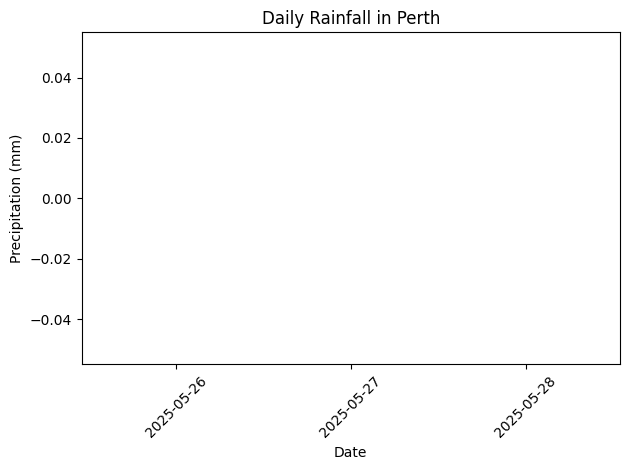

✔️ Checking Humidity Visualisation...


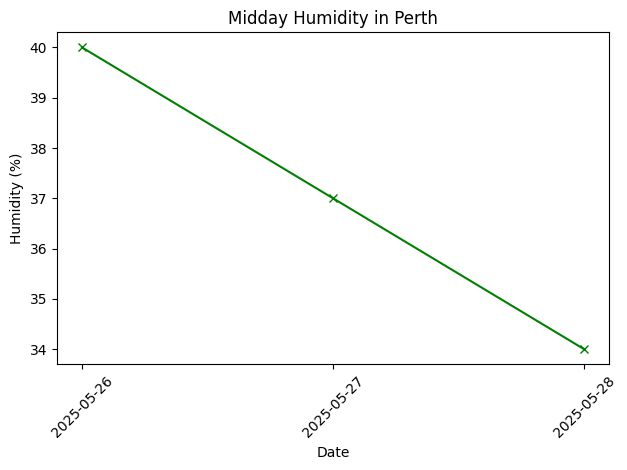

✅ Visualisation tests completed.

--- WeatherWise Main Menu ---
Select an option: 
1. Get Forecast
2. Ask a Weather Question
3. Run Tests
4. Exit


In [ ]:
# Entry point of the script.
if __name__ == "__main__":
    # Call the main menu function to start the application.
    menu()